In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
cash_out = df[df['type']=='CASH_OUT']
cash_out.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0


In [4]:
cash_out.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
cash_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237500 entries, 3 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 204.8+ MB


In [7]:
cash_out.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06,2237500.0
mean,2.409007e+02,1.762740e+05,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,1.839553e-03,0.0
std,1.407754e+02,1.753297e+05,1.791326e+05,1.091940e+05,3.633876e+06,3.663008e+06,4.285055e-02,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.550000e+02,7.266965e+04,0.000000e+00,0.000000e+00,1.146859e+05,2.858970e+05,0.000000e+00,0.0
50%,2.360000e+02,1.470722e+05,5.560000e+02,0.000000e+00,4.880985e+05,6.876067e+05,0.000000e+00,0.0
75%,3.320000e+02,2.465395e+05,3.144624e+04,0.000000e+00,1.510450e+06,1.741879e+06,0.000000e+00,0.0
max,7.430000e+02,1.000000e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,0.0


In [8]:
cash_out.shape

(2237500, 11)

C:\Users\ethan\AppData\Local\Temp\ipykernel_21940\1797680314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cash_out, x='isFraud', palette='pastel')


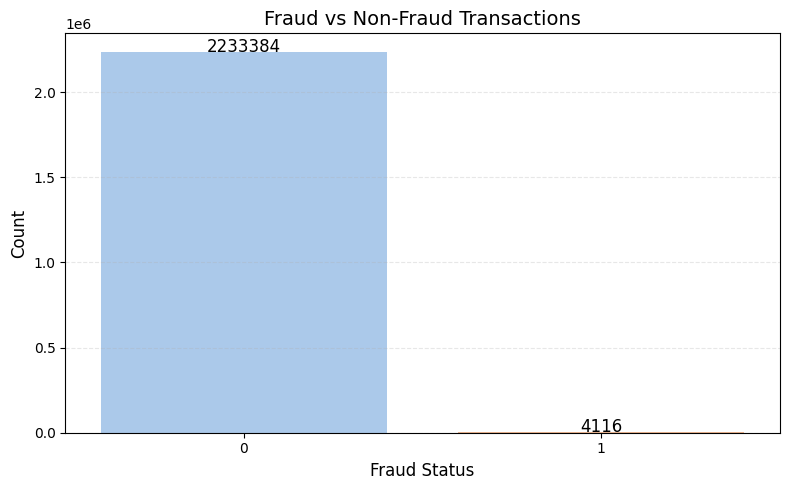

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=cash_out, x='isFraud', palette='pastel')

# Add the numbers manually using plt.text
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 100, f'{count}', ha='center', color='black', fontsize=12)

# Set titles and labels
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14, color='black')
plt.xlabel('Fraud Status', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_28004\1716551221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_out['balanceDiffOrig'] = cash_out['oldbalanceOrg'] - cash_out['newbalanceOrig']
C:\Users\ethan\AppData\Local\Temp\ipykernel_28004\1716551221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_out['balanceDiffDest'] = cash_out['newbalanceDest'] - cash_out['oldbalanceDest']


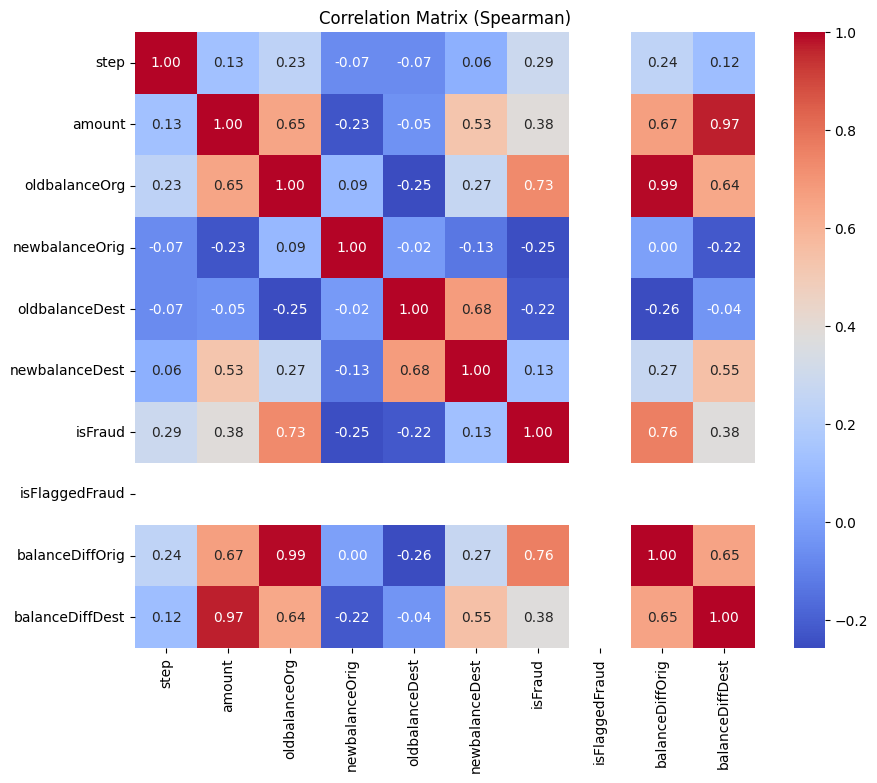

In [5]:
# Compute balance differences
cash_out['balanceDiffOrig'] = cash_out['oldbalanceOrg'] - cash_out['newbalanceOrig'] 
cash_out['balanceDiffDest'] = cash_out['newbalanceDest'] - cash_out['oldbalanceDest']
#splinting the data in fraud and not fraud
fraud_data = cash_out[cash_out['isFraud'] == 1]
non_fraud_data = cash_out[cash_out['isFraud'] == 0]

# Random sampling while maintaining class proportions
# This is especially useful for dealing with imbalanced datasets in a controlled manner.
non_fraud_sample = non_fraud_data.sample(n=len(fraud_data), random_state=42)

#Concat the balanced sample
balanced_df = pd.concat([fraud_data, non_fraud_sample])

#calculating the spearman correlation, just to be sure
# We use Spearman correlation to verify the relationship between numeric variables,
# as it is more robust to non-linear relationships compared to Pearson correlation.
spearman_correlation = balanced_df.select_dtypes(include=['float64', 'int64']).corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Spearman)")
plt.show()

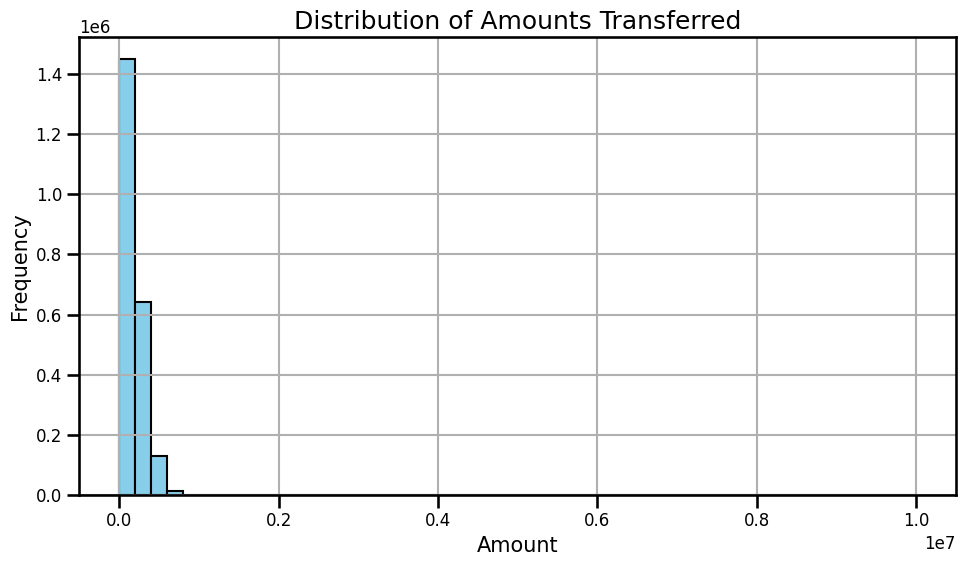

In [6]:
# Maximum amount transferred
max_amount = cash_out['amount'].max()

# Minimum amount transferred
min_amount = cash_out['amount'].min()

# Disable 'use_inf_as_null' option to avoid the error
sns.set_context("talk", rc={"axes.labelsize": 15, "axes.titlesize": 18, "xtick.labelsize": 12, "ytick.labelsize": 12})

# Plot histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(cash_out['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts Transferred')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

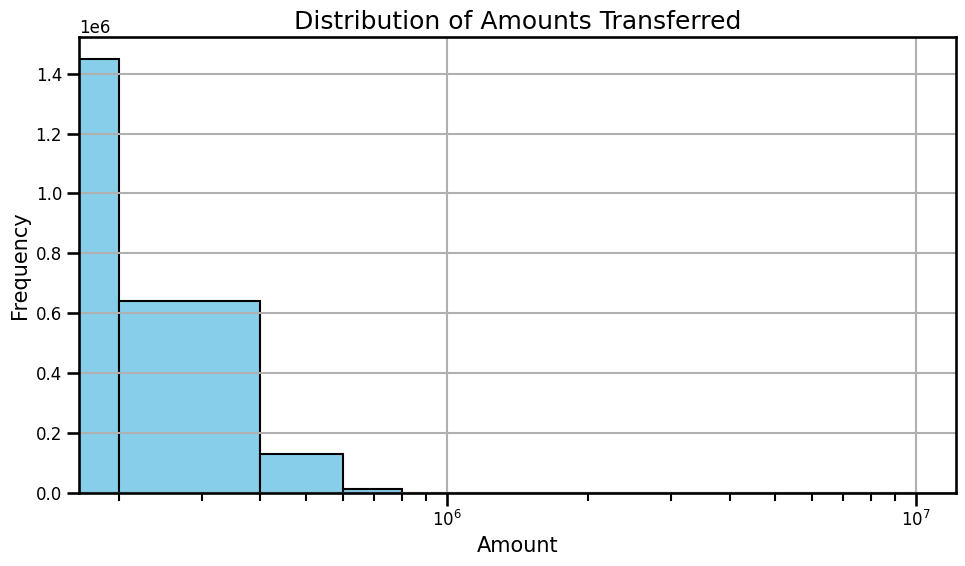

In [13]:
import matplotlib.pyplot as plt

# Plot histogram with a logarithmic scale on the x-axis
plt.figure(figsize=(10, 6))
plt.hist(cash_out['amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts Transferred')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Use logarithmic scale to compress the scale
plt.xscale('log')

plt.grid(True)
plt.tight_layout()
plt.show()

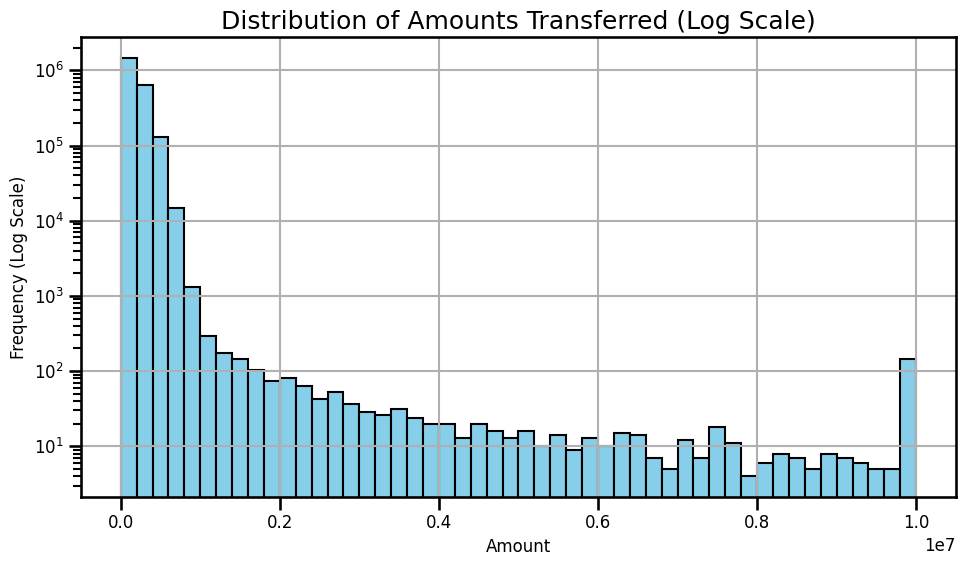

In [14]:
import matplotlib.pyplot as plt

# Plot histogram with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))
plt.hist(cash_out['amount'], bins=50, color='skyblue', edgecolor='black')

# Log scale on the y-axis to make differences more visible
plt.yscale('log')

plt.title('Distribution of Amounts Transferred (Log Scale)')
plt.xlabel('Amount', fontsize=12, color='black')
plt.ylabel('Frequency (Log Scale)', fontsize=12, color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(True)
plt.tight_layout()
plt.show()

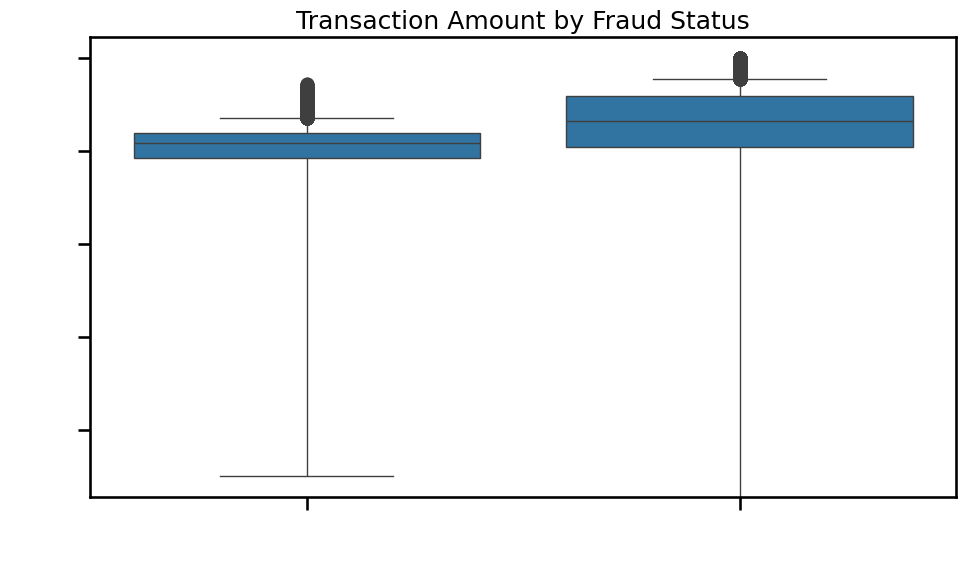

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=cash_out)
plt.title('Transaction Amount by Fraud Status')
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('Fraud Status', fontsize=12, color='white')
plt.ylabel('Amount', fontsize=12, color='white')
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()

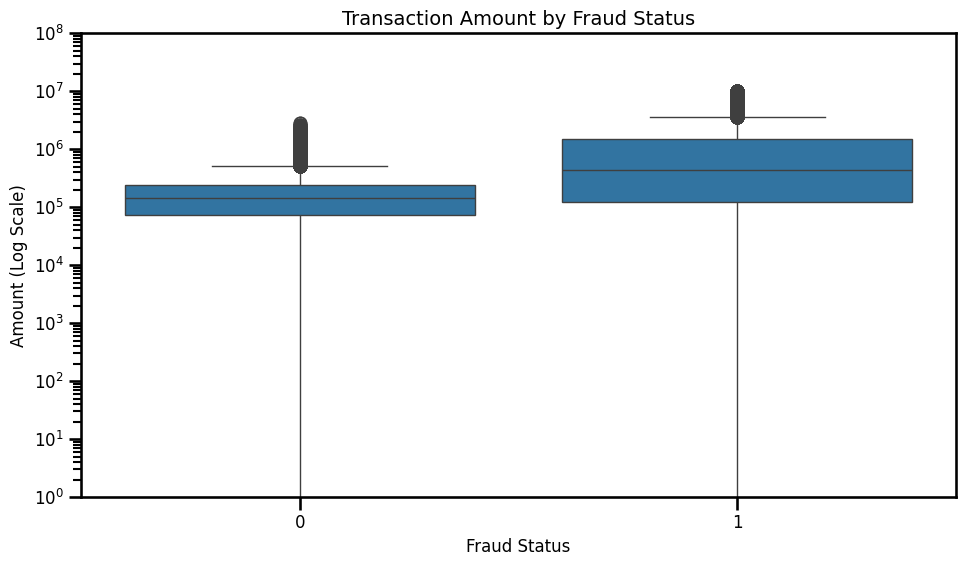

In [23]:
# Create the boxplot with the previous figure size
plt.figure(figsize=(10, 6))  # Original size

# Create the boxplot
sns.boxplot(x='isFraud', y='amount', data=cash_out)

# Title and axis labels
plt.title('Transaction Amount by Fraud Status', fontsize=14 )
plt.xlabel('Fraud Status', fontsize=12)
plt.ylabel('Amount (Log Scale)', fontsize=12)

# Apply log scale to y-axis for better visibility
plt.yscale('log')

# Adjust the y-axis limits to make the scale more visible
plt.ylim(1, 100000000)  # You can adjust these values depending on your data range

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_21940\1302463831.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='step', y='amount', hue='isFraud', data=cash_out, ci=None)


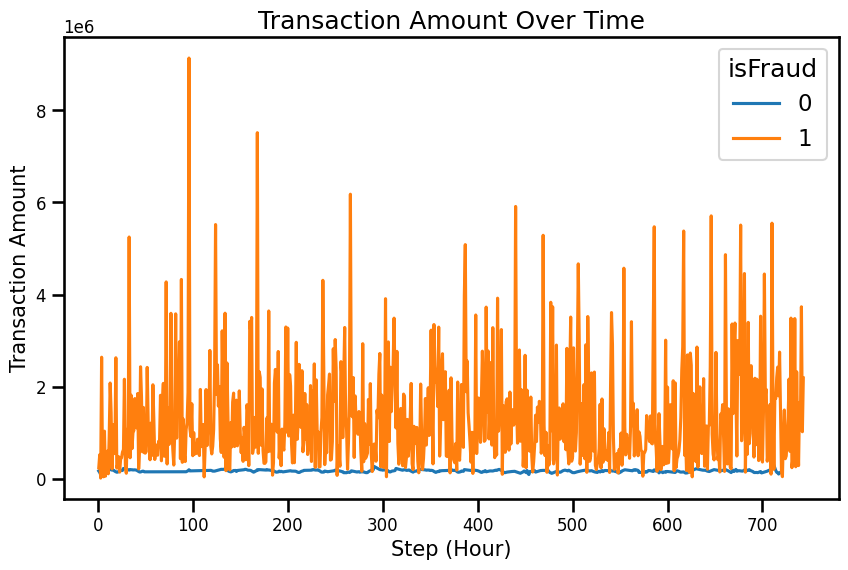

In [18]:
# Transaction count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='amount', hue='isFraud', data=cash_out, ci=None)
plt.title('Transaction Amount Over Time')
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Amount')
plt.show()